# Exploration

The first thing to do is to transform the ingredients into a big matrix, one-hot-encoder-like. 

Then, I will run some experiments with classification to see what I should expect (e.g. take the column for shallots as my target value, and see how accurately I can predict which combinations of ingredients would include shallots.

## Matrix

In [109]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import cluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataframe.csv', sep = '|')

In [25]:
masterlist = []
with open('masterlist.txt','r') as f:
    file = f.readlines()
    for line in file: 
        masterlist.append(line.replace('\n',''))

In [1]:
#masterlist

In [5]:
df

,name,url,ingredients,cleaned
0,arriba baked winter squash mexican style,https://www.food.com/recipe/137739,"['winter squash', 'mexican seasoning', 'mixed ...","['squash', 'mixed spice', 'honey', 'butter', '..."
1,a bit different breakfast pizza,https://www.food.com/recipe/31490,"['prepared pizza crust', 'sausage patty', 'egg...","['sage', 'egg', 'milk', 'salt', 'cheese']"
2,all in the kitchen chili,https://www.food.com/recipe/112140,"['ground beef', 'yellow onions', 'diced tomato...","['ground beef', 'yellow onion', 'diced tomato'..."
3,alouette potatoes,https://www.food.com/recipe/59389,"['spreadable cheese with garlic and herbs', 'n...","['cheese', 'potato', 'shallot', 'parsley', 'ol..."
4,amish tomato ketchup for canning,https://www.food.com/recipe/44061,"['tomato juice', 'apple cider vinegar', 'sugar...","['tomato', 'apple cider vinegar', 'sugar', 'sa..."
...,...,...,...,...
253707,Mushrooms in Marsala Wine (Funghi Alla Marsala),https://cooking.nytimes.com/recipes/31-mushroo...,"['1 ounce dried mushrooms, preferably imported...","['mushroom', 'mushroom', 'water', 'olive oil',..."
253708,Veal Scaloppine With Mushrooms Bordelaise,https://cooking.nytimes.com/recipes/30-veal-sc...,"['12 slices veal scaloppine, about 1 1/4 pound...","['veal', 'mushroom', 'olive oil', 'pea', 'oil'..."
253709,Mushroom and Meat Loaf,https://cooking.nytimes.com/recipes/28-mushroo...,"['1/2 pound mushrooms', '1 tablespoon butter',...","['mushroom', 'butter', 'onion', 'pork', 'veal'..."
253710,Mushroom and Pepper Salad,https://cooking.nytimes.com/recipes/29-mushroo...,"['1 large sweet red pepper, about 1/2 pound', ...","['red pepper', 'green pepper', 'celery', 'mush..."


In [9]:
vectorio = CountVectorizer()
# fit creates one entry for each different word seen  
X = vectorio.fit_transform(df['cleaned']).toarray()

In [12]:
#vectorio.vocabulary_

This turns out to do the wrong thing - counting every *word*, rather than every lemma/entry/ngram.

The ngram option in CountVectorizer is not helpful because it is too rigid - I want flexible ngrams, which change according to the number of words in a particular entry.

I'll see if I can do this by hand - it feels like this should not be too hard... (famous last words)

In [52]:
biglist = []
for i in range(len(df)):
    smallist = []
    for ingredient in masterlist: 
        if ingredient in df['cleaned'].iloc[i]:    
            smallist.append(1)
        else: 
            smallist.append(0)
    biglist.append(smallist)

In [53]:
matrix = pd.DataFrame(data = biglist, columns = masterlist)

In [54]:
matrix.head()

,extra virgin olive oil,sesame seed burger bun,thai red curry paste,thai green curry paste,blue food colouring,red chile flake,white chocolate chip,italian fennel sausage,red chilli powder,apple cider vinegar,...,garlic,rhubarb,cacao,vanilla,milk,chilli,courgette,pork,spaghetti,bread
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
matrix.isna().sum().sum()

0

## Classification

### Experiment 1: garlic

I'll try a very common ingredient for my first little classification experiment: garlic!

In [88]:
X = matrix.drop(columns = 'garlic')
y = matrix['garlic']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [90]:
regression = LogisticRegression()

In [91]:
regression.fit(X_train, y_train)

/Users/work/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
regression.score(X_train, y_train)

0.9247335561581635

In [93]:
regression.score(X_test, y_test)

0.9237087721511005

In [94]:
trainpredictions = regression.predict(X_train)

In [95]:
confusion_matrix(y_train, trainpredictions)

array([[162726,   2044],
       [ 12278,  13236]])

Alright - pretty cool!

### Experiment 2: rhubarb

In [96]:
X = matrix.drop(columns = 'rhubarb')
y = matrix['rhubarb']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

In [98]:
len(X_test)

63428

In [99]:
regression = LogisticRegression()

In [100]:
regression.fit(X_train, y_train)

LogisticRegression()

In [101]:
regression.score(X_train, y_train)

0.9974249017258414

In [102]:
regression.score(X_test, y_test)

0.9973986252128397

In [103]:
matrix['rhubarb'].value_counts()

0    253055
1       657
Name: rhubarb, dtype: int64

In [104]:
trainpredictions = regression.predict(X_train)

In [105]:
confusion_matrix(y_train, trainpredictions)

array([[189792,      0],
       [   490,      2]])

Not perfect, but at least it is somewhat better than a model that goes with a 0 every time.

In [106]:
testpredictions = regression.predict(X_test)

In [107]:
confusion_matrix(y_test, testpredictions)

array([[63263,     0],
       [  165,     0]])

Whoops!

# Clustering?

I'll look into the possibility of generating clusters here, based on these ingredients.

In [114]:
K = range(2, 20)
inertia = []
silhouette = []


for k in K:
    print(f"starting round {k}")
    kmeans = cluster.KMeans(n_clusters=k,
                    random_state=1989)
    kmeans.fit(matrix)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(matrix, kmeans.predict(matrix)))

starting round 2
starting round 3
starting round 4
starting round 5
starting round 6
starting round 7
starting round 8
starting round 9
starting round 10
starting round 11
starting round 12
starting round 13
starting round 14
starting round 15
starting round 16
starting round 17
starting round 18
starting round 19


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

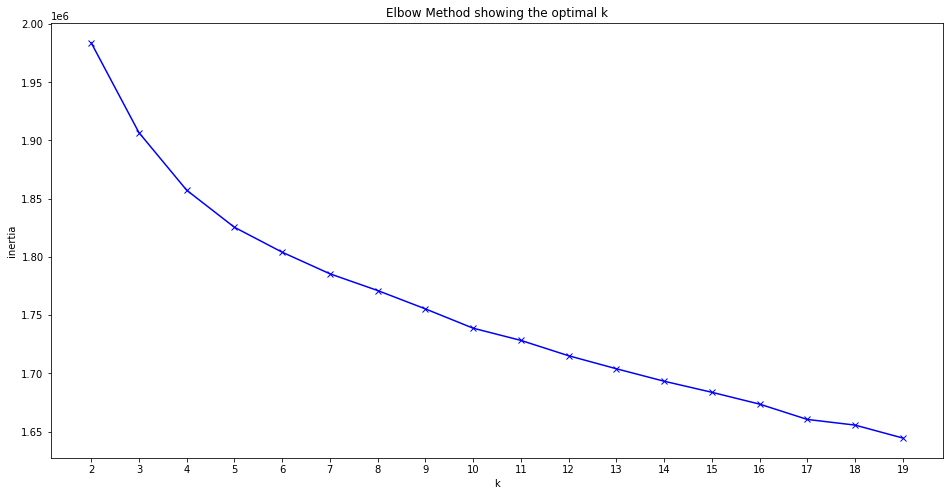

In [115]:
# Show the elbow graph thing
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

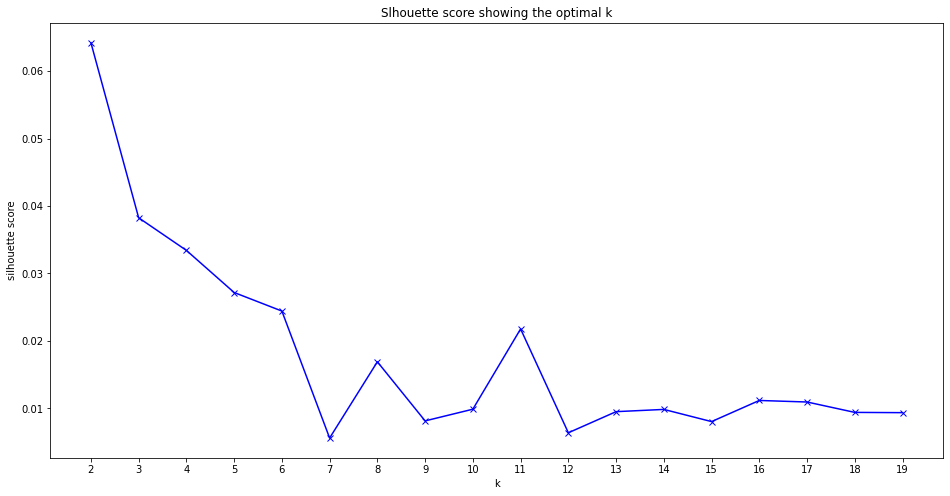

In [116]:
# Show the silhouette score
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

11 clusters seems like the right way to go

In [117]:
kmeans = cluster.KMeans(n_clusters=11, random_state=1989)
kmeans.fit(matrix)

KMeans(n_clusters=11, random_state=1989)

In [120]:
groups = kmeans.predict(matrix)

In [121]:
len(groups)

253712

In [118]:
clustered = pd.DataFrame()

In [119]:
clustered['recipe'] = df['name'].copy()

In [122]:
clustered['group'] = groups

In [2]:
#clustered.head(60)

In [3]:
#clustered[clustered['group']==0].head(60)

In [126]:
# 0: lots of soups and sauces

In [4]:
#clustered[clustered['group']==1].head(60)

In [128]:
# ???

In [5]:
#clustered[clustered['group']==2].head(60)

In [130]:
# 2: sweets and booze

In [6]:
#clustered[clustered['group']==3].head(60)

In [7]:
#clustered[clustered['group']==4].head(60)

In [8]:
#clustered[clustered['group']==5].head(60)

In [134]:
#5: sweets

Based on these few samples, I'm really not sure that there is anything useful to get from clustering. I want to focus on the combinations of individual ingredients right now, not group the overall recipes.

# Some more pruning

In exploring the data, I found out that some of my 533 ingredients have zero instances (e.g. 'blue food coloring' and 'thai red curry paste'. I'll weed out those columns.

In [138]:
frequencies = {}
for column in matrix.columns:
    frequencies[column] = matrix[column].sum()

In [141]:
frequencies = sorted(frequencies.items(), key=lambda item: item[1], reverse = True)

In [9]:
#frequencies

In [143]:
droplist = []
for i in frequencies:
    if i[1] == 0:
        droplist.append(i[0])

In [145]:
len(droplist)

57

In [152]:
'pear' in masterlist

True

In [149]:
'chickpea' in masterlist

True

In [155]:
'egg plant' in masterlist

True

In [156]:
len(masterlist)

533

In [157]:
'aubergine' in masterlist

True

In [10]:
#frequencies

In [167]:
'chickpeas' in masterlist

False

In [170]:
matrix.to_csv('matrix.csv', index = False)